In [42]:
# import important library

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve,accuracy_score,roc_auc_score
from  scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
print('Dataset shape:',df.shape)

Dataset shape: (8124, 23)


In [8]:
df['class'].unique() #here p means poisonous and e means edible

array(['p', 'e'], dtype=object)

In [9]:
df['veil-type'].unique() # it has only one category in veil type so we can drop it . 

array(['p'], dtype=object)

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [11]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

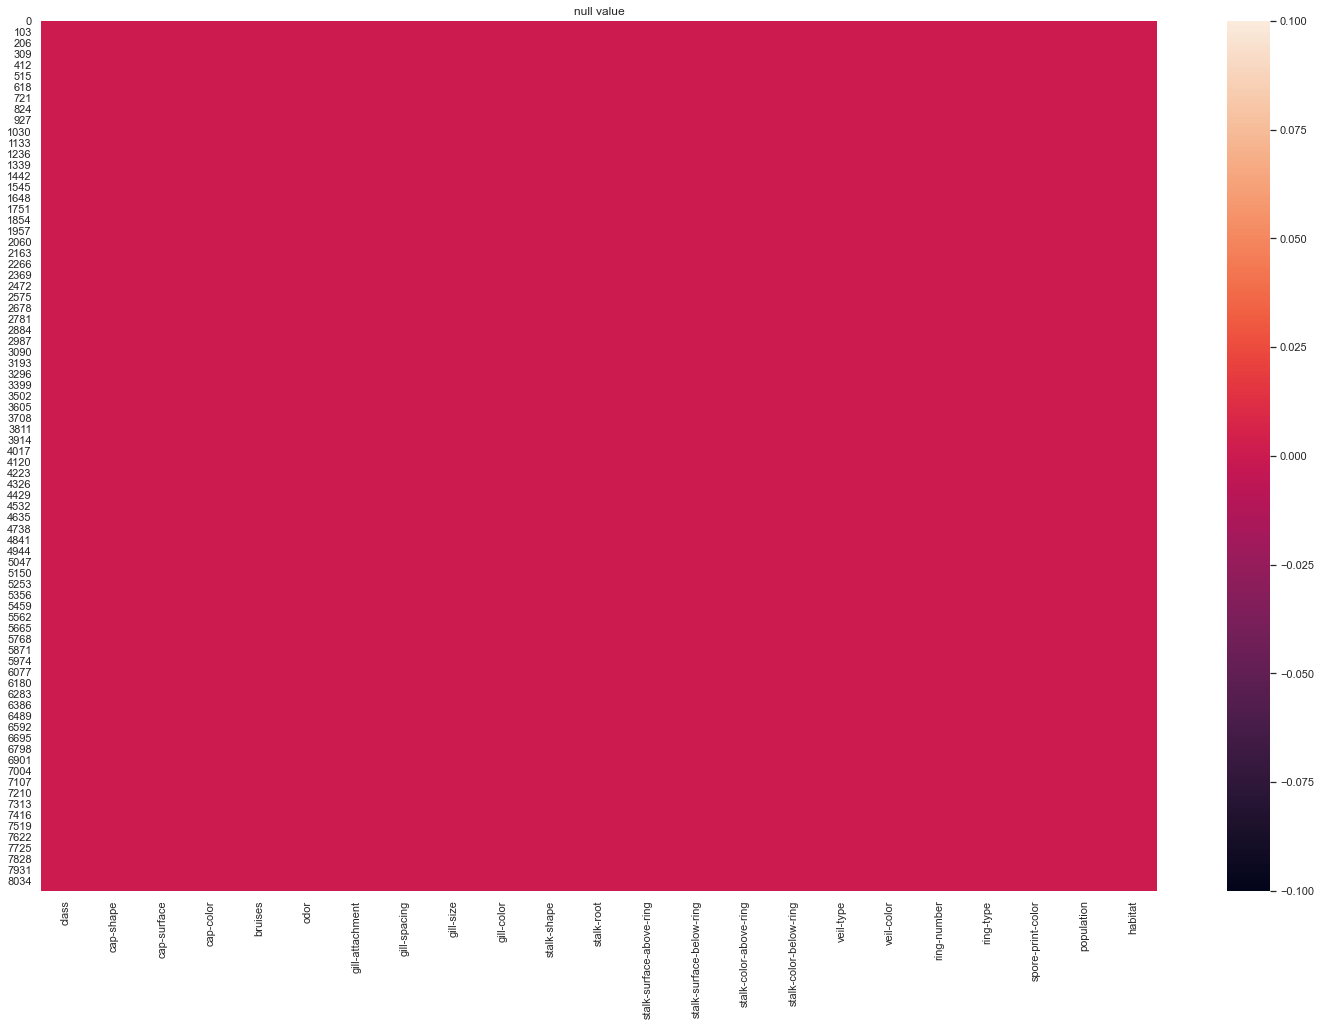

In [12]:
plt.figure(figsize=[25,16])
sns.heatmap(df.isnull())
plt.title('null value')
plt.show()
           

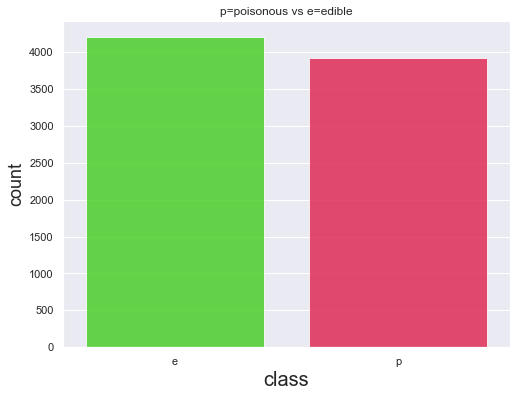

In [13]:
count=df['class'].value_counts()
plt.figure(figsize=[8,6])
sns.barplot(count.index,count.values,alpha=0.8,palette='prism')
plt.xlabel('class',fontsize=20)
plt.ylabel('count',fontsize=18)
plt.title('p=poisonous vs e=edible')
plt.show()

In [14]:
df=df.astype('category')
df.dtypes

# now all the categorical vaule into numeric form using encoder technic

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [15]:
label_encoder=LabelEncoder()

for column in df.columns:
    
    df[column]=label_encoder.fit_transform(df[column])
df.head()    
# here p=1 and e=0    
    
    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
df['veil-type'].unique() # this contains only single value that is 0.so we can drop it from the table 

array([0])

In [17]:
df=df.drop(['veil-type'],axis=1)


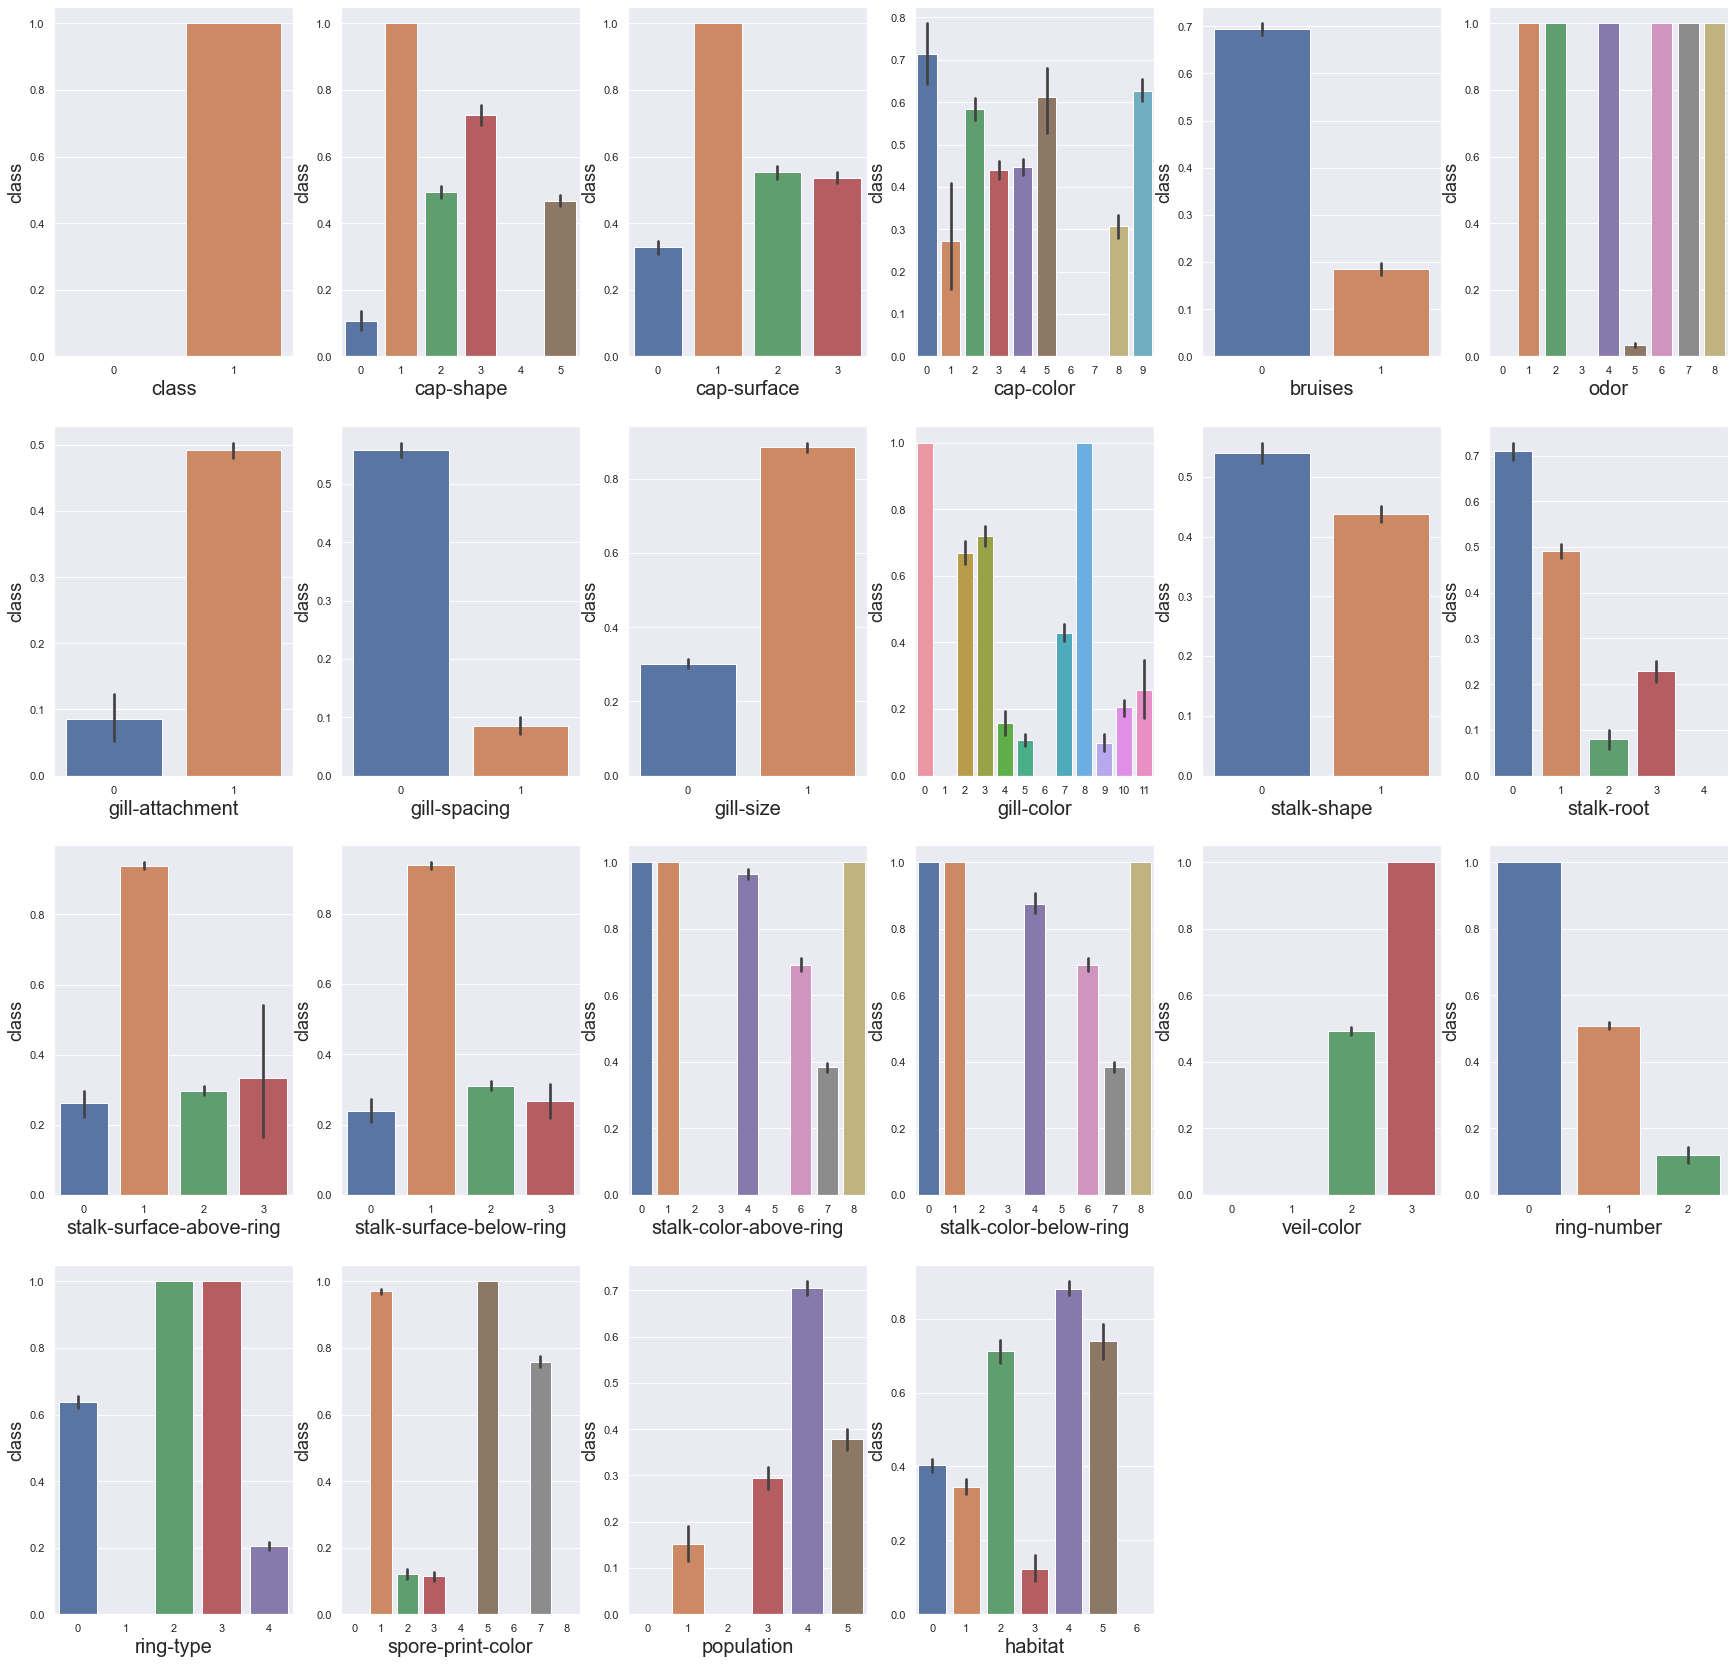

In [40]:
plt.figure(figsize=[30,45])
plotnumber=1

for column in df.columns:
    if plotnumber<=36:
        ax=plt.subplot(6,6,plotnumber)
    
    
        sns.barplot(df[column],df['class'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=18)
    plotnumber+=1    
plt.show()


    
    

# corelation

In [19]:
corr_matrix=df.corr()
corr_matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


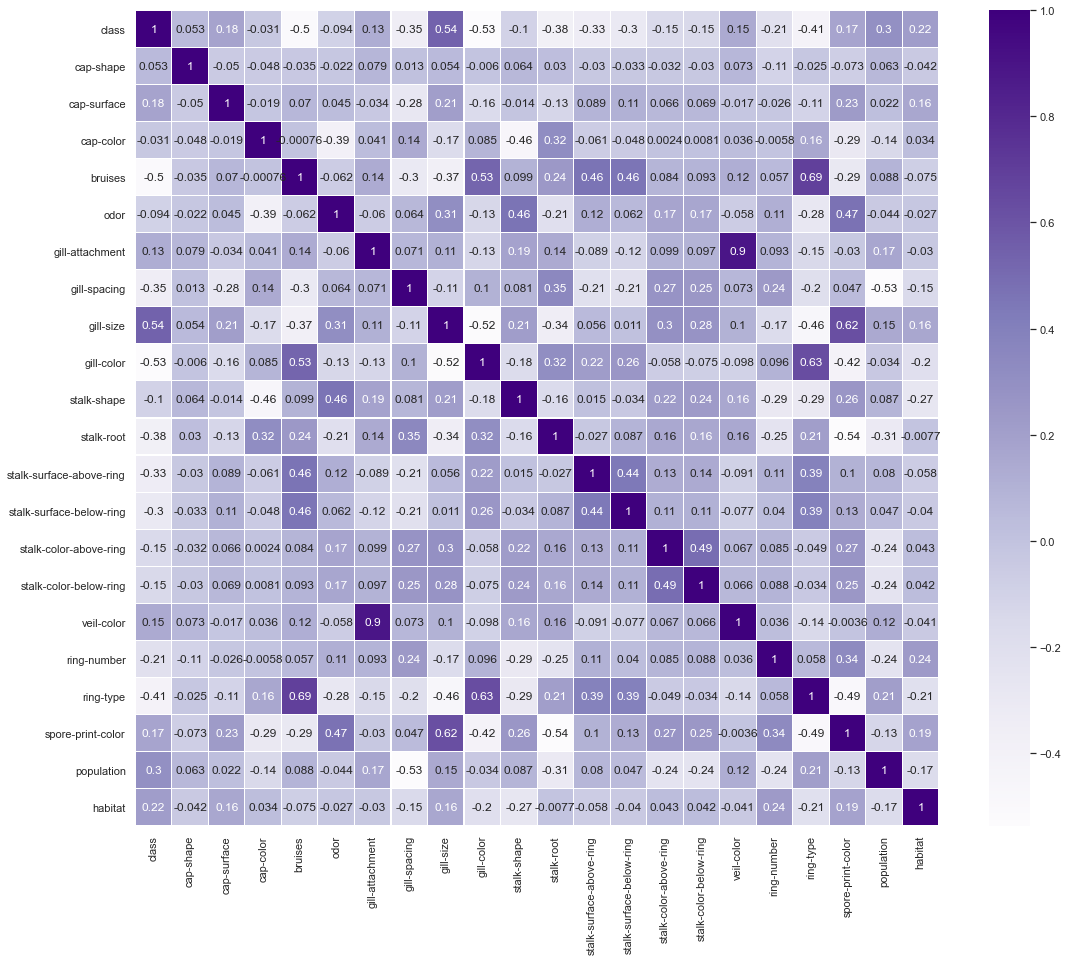

In [20]:
plt.figure(figsize=[18,15])
sns.heatmap(corr_matrix,annot=True,linewidths=0.1,cmap='Purples')
plt.show()

In [21]:
corr_matrix=df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

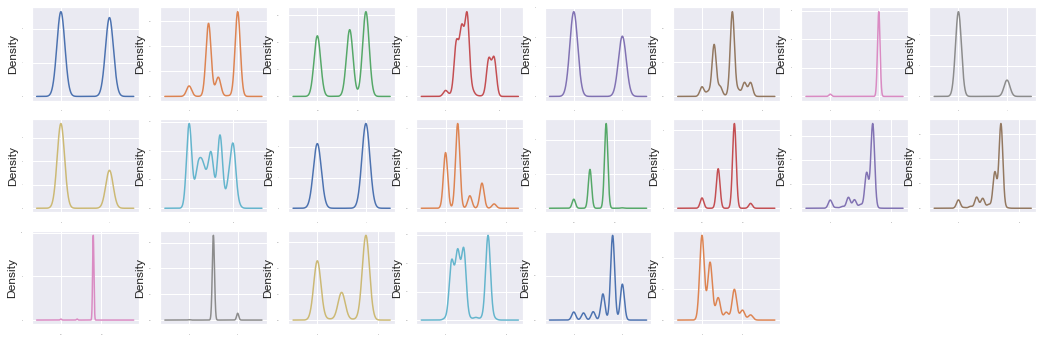

In [22]:
df.plot(kind='density',subplots=True,layout=(6,8),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [23]:
x=df.drop(['class'],axis=1)
y=df['class']

In [24]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [25]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

# model

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=340)

In [60]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,pred_dt))
print('confusion matrix:-\n' ,confusion_matrix(y_test,pred_dt))
print("roc_auc_score:-",roc_auc_score(y_test,pred_dt))
print("classification report:-\n\n",classification_report(y_test,pred_dt))



accuracy score:-
 1.0
confusion matrix:-
 [[1030    0]
 [   0 1001]]
roc_auc_score:- 1.0
classification report:-

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       1.00      1.00      1.00      1001

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [59]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predrf))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predrf))
print("roc_auc_score:-",roc_auc_score(y_test,predrf))
print("classification report:-\n\n",classification_report(y_test,predrf))



accuracy score:-
 1.0
confusion matrix:-
 [[1030    0]
 [   0 1001]]
roc_auc_score:- 1.0
classification report:-

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       1.00      1.00      1.00      1001

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [58]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predlr))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predlr))
print("roc_auc_score:-",roc_auc_score(y_test,predlr))
print("classification report:-\n\n",classification_report(y_test,predlr))



accuracy score:-
 0.9419005416051206
confusion matrix:-
 [[990  40]
 [ 78 923]]
roc_auc_score:- 0.9416214853108057
classification report:-

               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1030
           1       0.96      0.92      0.94      1001

    accuracy                           0.94      2031
   macro avg       0.94      0.94      0.94      2031
weighted avg       0.94      0.94      0.94      2031



In [55]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predknn))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predknn))
print("roc_auc_score:-",roc_auc_score(y_test,predknn))
print(classification_report(y_test,predknn))



accuracy score:-
 0.9985228951255539
confusion matrix:-
 [[1029    1]
 [   2  999]]
roc_auc_score:- 0.998515562107795
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       1.00      1.00      1.00      1001

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [61]:
svm=SVC()   
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predsvm))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predsvm))
print("roc_auc_score:-",roc_auc_score(y_test,predsvm))
print('classification report:-\n\n',classification_report(y_test,predsvm))


accuracy score:-
 0.9881831610044313
confusion matrix:-
 [[1029    1]
 [  23  978]]
roc_auc_score:- 0.9880260516182846
classification report:-

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1030
           1       1.00      0.98      0.99      1001

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



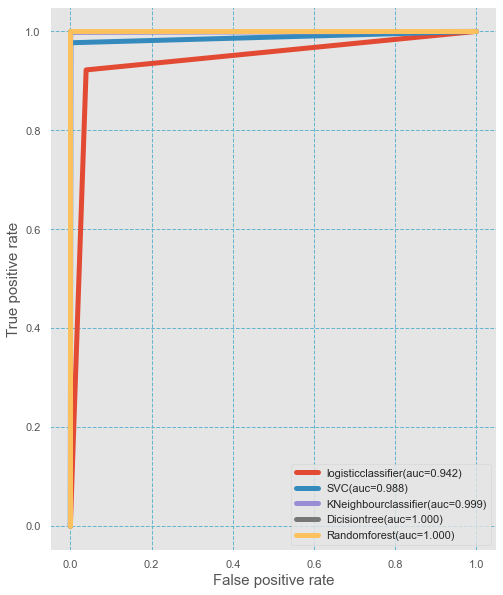

In [81]:
logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,predlr)

auc_logistic=auc(logistic_fpr,logistic_tpr)



svc_fpr,svc_tpr,threshold=roc_curve(y_test,predsvm)

auc_svc=auc(svc_fpr,svc_tpr)


randomforest_fpr,randomforest_tpr,threshold=roc_curve(y_test,predrf)

auc_randomforest=auc(randomforest_fpr,randomforest_tpr)


knn_fpr,knn_tpr,threshold=roc_curve(y_test,predknn)

auc_knn=auc(knn_fpr,knn_tpr)


dt_fpr,dt_tpr,threshold=roc_curve(y_test,pred_dt)

auc_dt=auc(dt_fpr,dt_tpr)
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=[8,10])

plt.plot(logistic_fpr,logistic_tpr,linestyle='-',linewidth=5,label='logisticclassifier(auc=%0.3f)'% auc_logistic)
plt.plot(svc_fpr,svc_tpr,linestyle='-',label='SVC(auc=%0.3f)'% auc_svc,linewidth=5)
plt.plot(knn_fpr,knn_tpr,linestyle='-',label='KNeighbourclassifier(auc=%0.3f)'% auc_knn,linewidth=5)
plt.plot(dt_fpr,dt_tpr,linestyle='-',label='Dicisiontree(auc=%0.3f)'% auc_dt,linewidth=5)
plt.plot(randomforest_fpr,randomforest_tpr,linestyle='-',label='Randomforest(auc=%0.3f)'% auc_randomforest,linewidth=5)

plt.xlabel('False positive rate',fontsize=15)
plt.ylabel('True positive rate',fontsize=15)

plt.legend()
plt.grid(color='c',linestyle='--',linewidth=1)
plt.show()









# Testing

# Dicision tree classifier

In [73]:
pred_dt=dt.predict(x_test)

print('this is predicted values:-\n',pred_dt[:20])
print('this is test values:-\n',y_test[:20].values)

this is predicted values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1]
this is test values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1]


# Randomforest classifier

In [74]:
predrf=rf.predict(x_test)

print('this is predicted values:-\n',predrf[:20])
print('this is test values:-\n',y_test[:20].values)

this is predicted values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1]
this is test values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1]


# KNeighbourclassifier

In [75]:
predknn=knn.predict(x_test)

print('this is predicted values:-\n',predknn[:20])
print('this is test values:-\n',y_test[:20].values)

this is predicted values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1]
this is test values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1]


# Logisticregressionclassifier

In [76]:
predlr=lr.predict(x_test)

print('this is predicted values:-\n',predlr[:20])
print('this is test values:-\n',y_test[:20].values)

this is predicted values:-
 [1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1]
this is test values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1]


# SVC

In [77]:
predsvm=svm.predict(x_test)
print('this is predicted values:-\n',predsvm[:20])
print('this is test values:-\n',y_test[:20].values)

this is predicted values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1]
this is test values:-
 [1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1]
